# Multi-class Classification Example

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset for multi-class classification
n = 500
df = pd.DataFrame(
    {
        "id": range(1, n + 1),
        "age": np.random.randint(18, 70, n),
        "income": np.random.randint(20000, 120000, n),
        "gender": np.random.choice(["Male", "Female"], n),
        "region": np.random.choice(["North", "South", "East", "West"], n),
        "purchases": np.random.poisson(5, n),
        "segment": np.random.choice([0, 1, 2], n, p=[0.4, 0.35, 0.25]),
    }
)

# Save CSV file
df.to_csv("sample_multiclass_data.csv", index=False)
print("Dataset saved as sample_multiclass_data.csv")
df.head()


Dataset saved as sample_multiclass_data.csv


,id,age,income,gender,region,purchases,segment
0,1,22,35786,Male,East,6,0
1,2,53,25058,Male,North,3,0
2,3,59,27323,Male,North,8,2
3,4,54,82560,Male,North,4,0
4,5,66,95015,Male,West,5,1


/Users/206793281/Documents/ab/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:21:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.32      0.32        38
           1       0.29      0.42      0.35        33
           2       0.21      0.10      0.14        29

    accuracy                           0.29       100
   macro avg       0.27      0.28      0.27       100
weighted avg       0.28      0.29      0.27       100



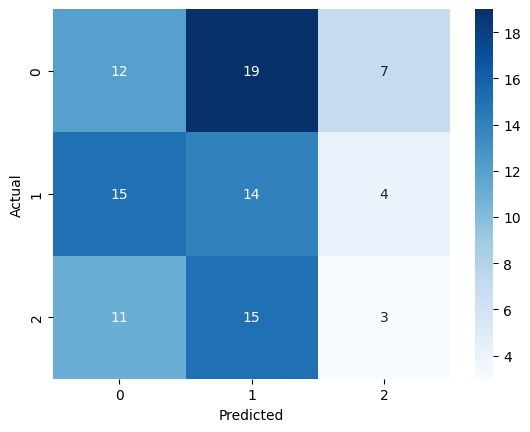

In [5]:

# Encode categorical variables
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['region'] = LabelEncoder().fit_transform(df['region'])

X = df.drop(columns=["id", "segment"])
y = df["segment"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


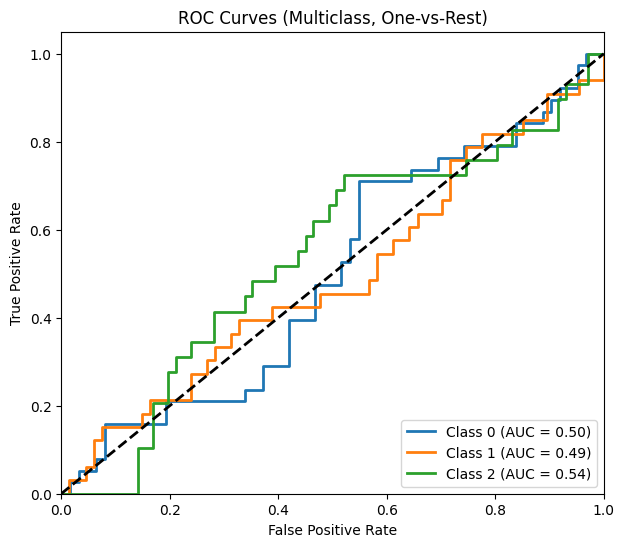

In [6]:
# Binarize labels for one-vs-rest
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i, c in enumerate(classes):
    fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves
plt.figure(figsize=(7, 6))
for i, c in enumerate(classes):
    plt.plot(fpr[c], tpr[c], lw=2, label=f"Class {c} (AUC = {roc_auc[c]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Multiclass, One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()